In [4]:
# help(yf)

In [64]:
import yfinance as yf
import pandas as pd

In [207]:
# import  required modeules
import yfinance as yf
import pandas as pd
from datetime import datetime

# list of instruments (manual input)
INSTRUMENTS = ['AAPL', 'AMZN', 'MSFT', 'DIS', 'FB', 'NVDA', 'EA', 'ATVI', '^IXIC']

# empty dict for data by instrument
price_hists = {}

# for loop to download data from YF for instruments
for i in INSTRUMENTS:
    df = yf.Ticker(i).history(period="max").drop(["Dividends", "Stock Splits"], axis=1)
    df["Ticker"] = i
    price_hists[i] = df

# insert into excel or csv file
#df.to_excel(f"{'/Users/gdi16/Library/Mobile Documents/com~apple~CloudDocs/Docs GDI MBP/Programming/JupyterLabNotebooks/Python for Data Analysis and Visualisation'}/{i}.xlsx")

#df.to_csv(f"{'/Users/gdi16/Library/Mobile Documents/com~apple~CloudDocs/Docs GDI MBP/Programming/JupyterLabNotebooks/Python for Data Analysis and Visualisation'}/{i}.csv")

In [108]:
#Tickers = yf.Tickers('aapl msft')
#Tickers.tickers.MSFT.history(period='1mo')

#help(yf)

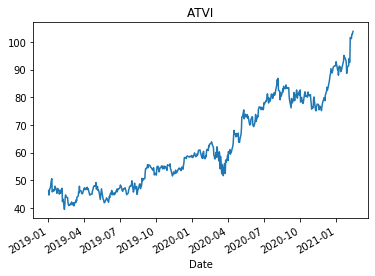

In [122]:
#price_hists

df['Close'].loc['2019-01-02':'2021-02-12'].plot(title = df['Ticker'].loc['2021-02-12'])

In [39]:
# adding tickers info into one table df_full

df_full = None
for ticker in price_hists.keys():
    df_ticker = price_hists[ticker]
    if df_full is None:  # первый тикер
        df_full = df_ticker
    else:
        df_full = pd.concat([df_full, df_ticker], axis=0)
    #df_full = df_full.reset_index()
    df_full = df_full.drop_duplicates() # на всякий случай удаляем дубликаты

In [40]:
df_full["Ticker"].unique()

array(['AAPL', 'AMZN', 'MSFT', '^IXIC', 'DIS', 'FB', 'NVDA', 'EA', 'ATVI'],
      dtype=object)

In [26]:
df_full.to_csv(f"{'/Users/gdi16/Library/Mobile Documents/com~apple~CloudDocs/Docs GDI MBP/Programming/JupyterLabNotebooks/Python for Data Analysis and Visualisation'}/{'YF_Data_'}{datetime.today().date()}.csv")


In [107]:
#df_full.filter(items = ['Ticker'])

#price_hists['MSFT']

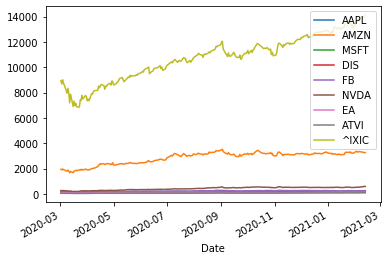

In [203]:
import matplotlib as plt

INSTRUMENTS = ['AAPL', 'AMZN', 'MSFT', 'DIS', 'FB', 'NVDA', 'EA', 'ATVI', '^IXIC']

for i in INSTRUMENTS:
    price_hists[i]['Close'].loc['2020-03-01':'2021-02-12'].plot().legend(price_hists.keys())

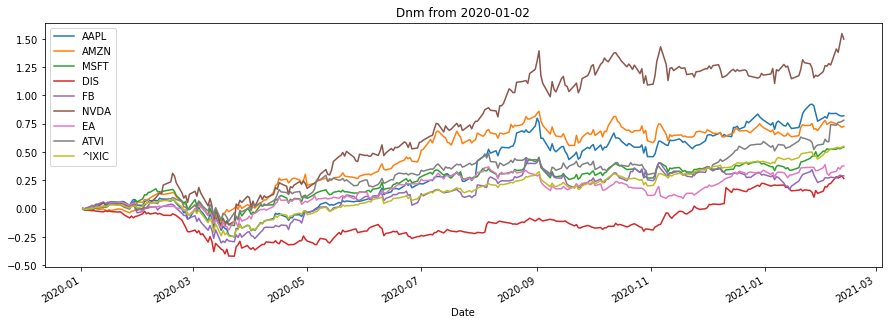

In [214]:
import matplotlib as plt

INSTRUMENTS = ['AAPL', 'AMZN', 'MSFT', 'DIS', 'FB', 'NVDA', 'EA', 'ATVI', '^IXIC']

#price_hists1[i]["Close"] = price_hists[i]["Close"].loc['2020-02-28':'2020-02-28']
#price_hists1 = price_hists

start_date = '2020-01-02'
end_date = '2021-02-12'

ph_all = {}

for i in INSTRUMENTS:
    ph_all = (price_hists[i]['Close'].loc[start_date:end_date] / price_hists[i]['Close'].loc[start_date] - 1).plot(figsize = (15,5), title = 'Dnm from ' + start_date).legend(price_hists.keys())


#ph1['AAPL'].plot(title = 'Dnm from ' + start_date).legend(ph1.keys())
    

In [242]:
# sum

# Summarize
# INSTRUMENTS = INSTRUMENTS.pop()


for i in INSTRUMENTS:
    pr += price_hists[i]
    

# GRAPH
pr_relative = (pr['Close'].loc[start_date:end_date] / pr['Close'].loc[start_date] - 1)

pr_relative.plot(title = 'Portfolio dnm from ' + start_date, figsize = (15,5)).legend('Portfolio')


# Select ticker to compare
ticker_select = '^IXIC'

# GRAPH
benchmark = (price_hists[ticker_select]['Close'].loc[start_date:end_date] / price_hists[ticker_select]['Close'].loc[start_date] - 1)

benchmark.plot().legend(ticker_select)



#price_hists['MSFT']


ValueError: Unable to coerce to Series, length must be 6: given 0

In [211]:
len(INSTRUMENTS)

8

In [209]:
inst_p = INSTRUMENTS.pop()
INSTRUMENTS

['AAPL', 'AMZN', 'MSFT', 'DIS', 'FB', 'NVDA', 'EA', 'ATVI']

In [241]:
price_hists

{'AAPL':                   Open        High         Low       Close     Volume Ticker
 Date                                                                        
 1980-12-12    0.100922    0.101361    0.100922    0.100922  469033600   AAPL
 1980-12-15    0.096096    0.096096    0.095657    0.095657  175884800   AAPL
 1980-12-16    0.089075    0.089075    0.088636    0.088636  105728000   AAPL
 1980-12-17    0.090830    0.091268    0.090830    0.090830   86441600   AAPL
 1980-12-18    0.093463    0.093902    0.093463    0.093463   73449600   AAPL
 ...                ...         ...         ...         ...        ...    ...
 2021-02-08  136.029999  136.960007  134.919998  136.910004   71297200   AAPL
 2021-02-09  136.619995  137.880005  135.850006  136.009995   76774200   AAPL
 2021-02-10  136.479996  136.990005  134.399994  135.389999   73046600   AAPL
 2021-02-11  135.899994  136.389999  133.770004  135.130005   64154400   AAPL
 2021-02-12  134.350006  135.529999  133.690002  135.369

In [190]:
pr_relative

Date
2020-01-02    0.000000
2020-01-03   -0.008732
2020-01-06   -0.001410
2020-01-07   -0.001125
2020-01-08    0.003081
                ...   
2021-02-08    0.585852
2021-02-09    0.585846
2021-02-10    0.583246
2021-02-11    0.587571
2021-02-12    0.593442
Name: Close, Length: 282, dtype: float64

In [127]:
#price_hists1[i]["Close"] = price_hists[i]["Close"].loc['2020-02-28':'2020-02-28']
price_hists['AAPL']['Close'].loc['2020-02-28']


67.8143310546875

In [ ]:
price_hists

In [105]:
#price_hists

In [81]:
price_hists[i]['Close'].loc['2020-02-28':'2021-02-12'] / price_hists[i]['Close'].loc['2020-02-28':'2020-02-28']

Date
2020-02-28    1.0
2020-03-02    NaN
2020-03-03    NaN
2020-03-04    NaN
2020-03-05    NaN
             ... 
2021-02-08    NaN
2021-02-09    NaN
2021-02-10    NaN
2021-02-11    NaN
2021-02-12    NaN
Name: Close, Length: 243, dtype: float64

In [48]:
df_temp = pandas.read_excel('/Users/gdi16/Library/Mobile Documents/com~apple~CloudDocs/Docs GDI MBP/Programming/JupyterLabNotebooks/Python for Data Analysis and Visualisation')

In [49]:
df_temp

,Date,Open,High,Low,Close,Volume
0,1980-12-12,0.100922,0.101361,0.100922,0.100922,469033600
1,1980-12-15,0.096096,0.096096,0.095657,0.095657,175884800
2,1980-12-16,0.089075,0.089075,0.088636,0.088636,105728000
3,1980-12-17,0.090830,0.091268,0.090830,0.090830,86441600
4,1980-12-18,0.093463,0.093902,0.093463,0.093463,73449600
...,...,...,...,...,...,...
10122,2021-02-05,137.350006,137.419998,135.860001,136.759995,75524000
10123,2021-02-08,136.029999,136.960007,134.919998,136.910004,71297200
10124,2021-02-09,136.619995,137.880005,135.850006,136.009995,76774200
10125,2021-02-10,136.479996,136.990005,134.399994,135.389999,73046600


In [21]:

df = yf.Ticker("USD").history(period="max").drop(["Dividends", "Stock Splits"], axis=1)
df

,Open,High,Low,Close,Volume
Date,,,,,
2007-02-01,10.293599,10.293599,10.293599,10.293599,3000
2007-02-02,10.478321,10.478321,10.478321,10.478321,15000
2007-02-05,10.690681,10.690681,10.558320,10.622319,17400
2007-02-06,10.457961,10.523415,10.327055,10.520506,15600
2007-02-07,10.677590,10.857950,10.588865,10.857950,21600
...,...,...,...,...,...
2021-02-05,118.160004,118.160004,114.449997,114.599998,19000
2021-02-08,115.400002,122.190002,115.400002,122.190002,51300
2021-02-09,121.620003,123.059998,120.959999,121.129997,52900


In [8]:
import openpyxl

In [12]:
wb = openpyxl.load_workbook('Stocks_Data.xlsx')
wb.sheetnames

['Sheet1']

In [224]:
x = {'a':1, 'b':2}
y = {'a':10, 'b':20}

In [229]:
inst = ['a','b']

xx = 0

for i in inst:
    xx += x[i]

xx

3